# Recurrent Neural Networks

## Architecture
![Basic Architecture](Images/Unfolding.png)

We have
$$
h_t = W\left[\begin{array}{cc}
\boldsymbol{x} & h_{t-1}\end{array}\right]
$$
Also we have
$$
y_t = \sigma \left[ L\left[\begin{array}{cc}
\boldsymbol{x} & h_{t}\end{array}\right] \right]
$$

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.activation = nn.Tanh()

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), dim=1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.activation(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


def generate_output(input_tensor, rnn):
    with torch.no_grad():  # Turn off gradient tracking
        hidden = rnn.initHidden()
        outputs = []

        for i in range(input_tensor.size(0)):
            output, hidden = rnn(input_tensor[i], hidden)
            outputs.append(output)

        return outputs


# Function to detach hidden state after n steps
def detach_hidden(hidden, detach_steps):
    if hidden is None:
        return hidden
    else:
        return hidden.detach()

## nn.Linear

In [2]:
linear_layer = nn.Linear(5, 3)

In [3]:
input_tensor = torch.randn(2, 5)

In [4]:
linear_layer(input_tensor)

tensor([[ 0.4234,  0.1873,  0.2336],
        [-0.4105, -0.0896, -0.4211]], grad_fn=<AddmmBackward0>)

In [5]:
torch.cat((input_tensor, input_tensor), dim=0)

tensor([[-3.1894,  2.1864, -0.9718, -0.5177, -0.1994],
        [ 0.3803,  0.4924, -0.2703, -1.6253, -0.6559],
        [-3.1894,  2.1864, -0.9718, -0.5177, -0.1994],
        [ 0.3803,  0.4924, -0.2703, -1.6253, -0.6559]])

In [6]:
!pip install torchviz

# Usage

In [7]:
# Example usage
input_size = 5
hidden_size = 3
output_size = 5
detach_steps = 5

In [8]:
rnn = RNN(input_size, hidden_size, output_size)

## Some dummy variables

In [9]:
input = torch.randn(1, input_size)
hidden = torch.zeros(1, hidden_size)

In [10]:
for i in range(0, 100):
    output, hidden = rnn(input, hidden)
    if (i + 1) % detach_steps == 0:
        hidden = detach_hidden(hidden, detach_steps)
    #print(f' Output - {output} ')
    print(f' Output - {hidden} ')

 Output - tensor([[ 0.5182, -0.5385, -0.2904]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3015, -0.4844, -0.0427]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3303, -0.4783, -0.1654]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3401, -0.4919, -0.1204]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3295, -0.4840, -0.1324]]) 
 Output - tensor([[ 0.3350, -0.4873, -0.1310]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3329, -0.4863, -0.1302]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3335, -0.4865, -0.1309]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3334, -0.4865, -0.1306]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3334, -0.4864, -0.1307]]) 
 Output - tensor([[ 0.3334, -0.4865, -0.1307]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3334, -0.4865, -0.1307]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3334, -0.4865, -0.1307]], grad_fn=<AddmmBackward0>) 
 Output - tensor([[ 0.3334, -0.4865, -0.1307]], grad_fn=<AddmmBackward0>) 
 O

In [11]:
def train(input_tensor, target_tensor, rnn, optimizer, criterion, detach_steps):
    hidden = rnn.initHidden()
    rnn.zero_grad()
    loss = 0

    for i in range(input_tensor.size(0)):
        output, hidden = rnn(input_tensor[i], hidden)
        loss += criterion(output, target_tensor[i].unsqueeze(0))

        if (i + 1) % detach_steps == 0:
            hidden = hidden.detach()

    loss.backward()
    optimizer.step()

    return loss.item() / input_tensor.size(0), loss

In [12]:
# Example usage:
input_size = 10
hidden_size = 20
output_size = 5
detach_steps = 5

rnn = RNN(input_size, hidden_size, output_size)
optimizer = optim.SGD(rnn.parameters(), lr=0.01)
criterion = nn.NLLLoss()

In [13]:
# Dummy training data
input_tensor = torch.randn(10, 1, input_size)  # Sequence length = 10, batch size = 1
target_tensor = torch.tensor([1, 2, 3, 4, 0, 3, 2, 4, 1, 0])  # Example target classes

In [14]:
for epoch in range(100):
    loss, RLoss = train(input_tensor, target_tensor, rnn, optimizer, criterion, detach_steps)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

Epoch 1, Loss: 0.1035
Epoch 2, Loss: -0.0150
Epoch 3, Loss: -0.1307
Epoch 4, Loss: -0.2398
Epoch 5, Loss: -0.3374
Epoch 6, Loss: -0.4190
Epoch 7, Loss: -0.4839
Epoch 8, Loss: -0.5350
Epoch 9, Loss: -0.5757
Epoch 10, Loss: -0.6087
Epoch 11, Loss: -0.6361
Epoch 12, Loss: -0.6595
Epoch 13, Loss: -0.6802
Epoch 14, Loss: -0.6992
Epoch 15, Loss: -0.7175
Epoch 16, Loss: -0.7362
Epoch 17, Loss: -0.7566
Epoch 18, Loss: -0.7798
Epoch 19, Loss: -0.8060
Epoch 20, Loss: -0.8337
Epoch 21, Loss: -0.8593
Epoch 22, Loss: -0.8801
Epoch 23, Loss: -0.8958
Epoch 24, Loss: -0.9076
Epoch 25, Loss: -0.9168
Epoch 26, Loss: -0.9241
Epoch 27, Loss: -0.9302
Epoch 28, Loss: -0.9353
Epoch 29, Loss: -0.9397
Epoch 30, Loss: -0.9435
Epoch 31, Loss: -0.9470
Epoch 32, Loss: -0.9500
Epoch 33, Loss: -0.9528
Epoch 34, Loss: -0.9552
Epoch 35, Loss: -0.9575
Epoch 36, Loss: -0.9596
Epoch 37, Loss: -0.9615
Epoch 38, Loss: -0.9633
Epoch 39, Loss: -0.9649
Epoch 40, Loss: -0.9664
Epoch 41, Loss: -0.9678
Epoch 42, Loss: -0.9691
Ep

In [15]:
outputs = generate_output(input_tensor, rnn)
print("Generated outputs:", outputs)

Generated outputs: [tensor([[ 0.6136,  0.9755,  0.6696,  0.6279, -0.4426]]), tensor([[0.5983, 0.5093, 0.9876, 0.6215, 0.9440]]), tensor([[ 0.5245,  0.8348, -0.2325,  0.9950,  0.6182]]), tensor([[0.4772, 0.9864, 0.9988, 0.6525, 0.9963]]), tensor([[0.9936, 0.8426, 0.9723, 0.9572, 0.9553]]), tensor([[0.7198, 0.8490, 0.5320, 0.9944, 0.9786]]), tensor([[ 0.5646,  0.8594,  0.9969, -0.2703,  0.9798]]), tensor([[0.6192, 0.8327, 0.6699, 0.9637, 0.9970]]), tensor([[0.8156, 0.9948, 0.9739, 0.1704, 0.9965]]), tensor([[ 0.9961,  0.9600,  0.2032,  0.7727, -0.0896]])]


In [16]:
input_tensor

tensor([[[-8.9288e-01,  2.2474e+00, -1.9859e-01, -1.8820e+00,  3.6842e-01,
          -8.3003e-01,  6.2271e-01, -8.5767e-02, -4.9232e-01, -8.1964e-01]],

        [[ 3.3468e-01,  1.1573e-01, -3.4104e-01, -7.4440e-02,  9.2643e-02,
           9.8685e-01, -1.0752e-01,  2.0390e-01,  1.0076e+00, -1.2524e-02]],

        [[ 3.8137e-01,  2.2099e+00,  1.6158e+00,  7.7814e-01,  5.6027e-01,
          -2.3951e+00,  5.8336e-02, -5.4178e-01, -5.9143e-01, -1.1266e+00]],

        [[ 3.1465e-01,  5.8403e-01, -1.4483e+00, -1.4570e+00, -6.3206e-01,
           1.0339e+00,  3.3123e-01, -2.7956e-01,  4.0227e-01, -1.2489e+00]],

        [[-2.8956e-02,  1.1353e+00,  3.8723e-04,  1.2787e+00,  1.8719e+00,
           1.0836e+00,  4.4993e-01, -5.1714e-01,  1.1097e+00,  3.2746e-01]],

        [[ 6.1650e-01,  1.1661e+00,  7.3288e-01,  5.5996e-01, -3.3505e-01,
           3.9336e-01, -6.0120e-01,  1.5885e+00, -2.5005e-01,  1.7774e-01]],

        [[-9.4039e-01, -1.4251e+00, -2.0933e+00, -8.8523e-01,  2.1451e-02,
       

In [17]:
from torchviz import make_dot

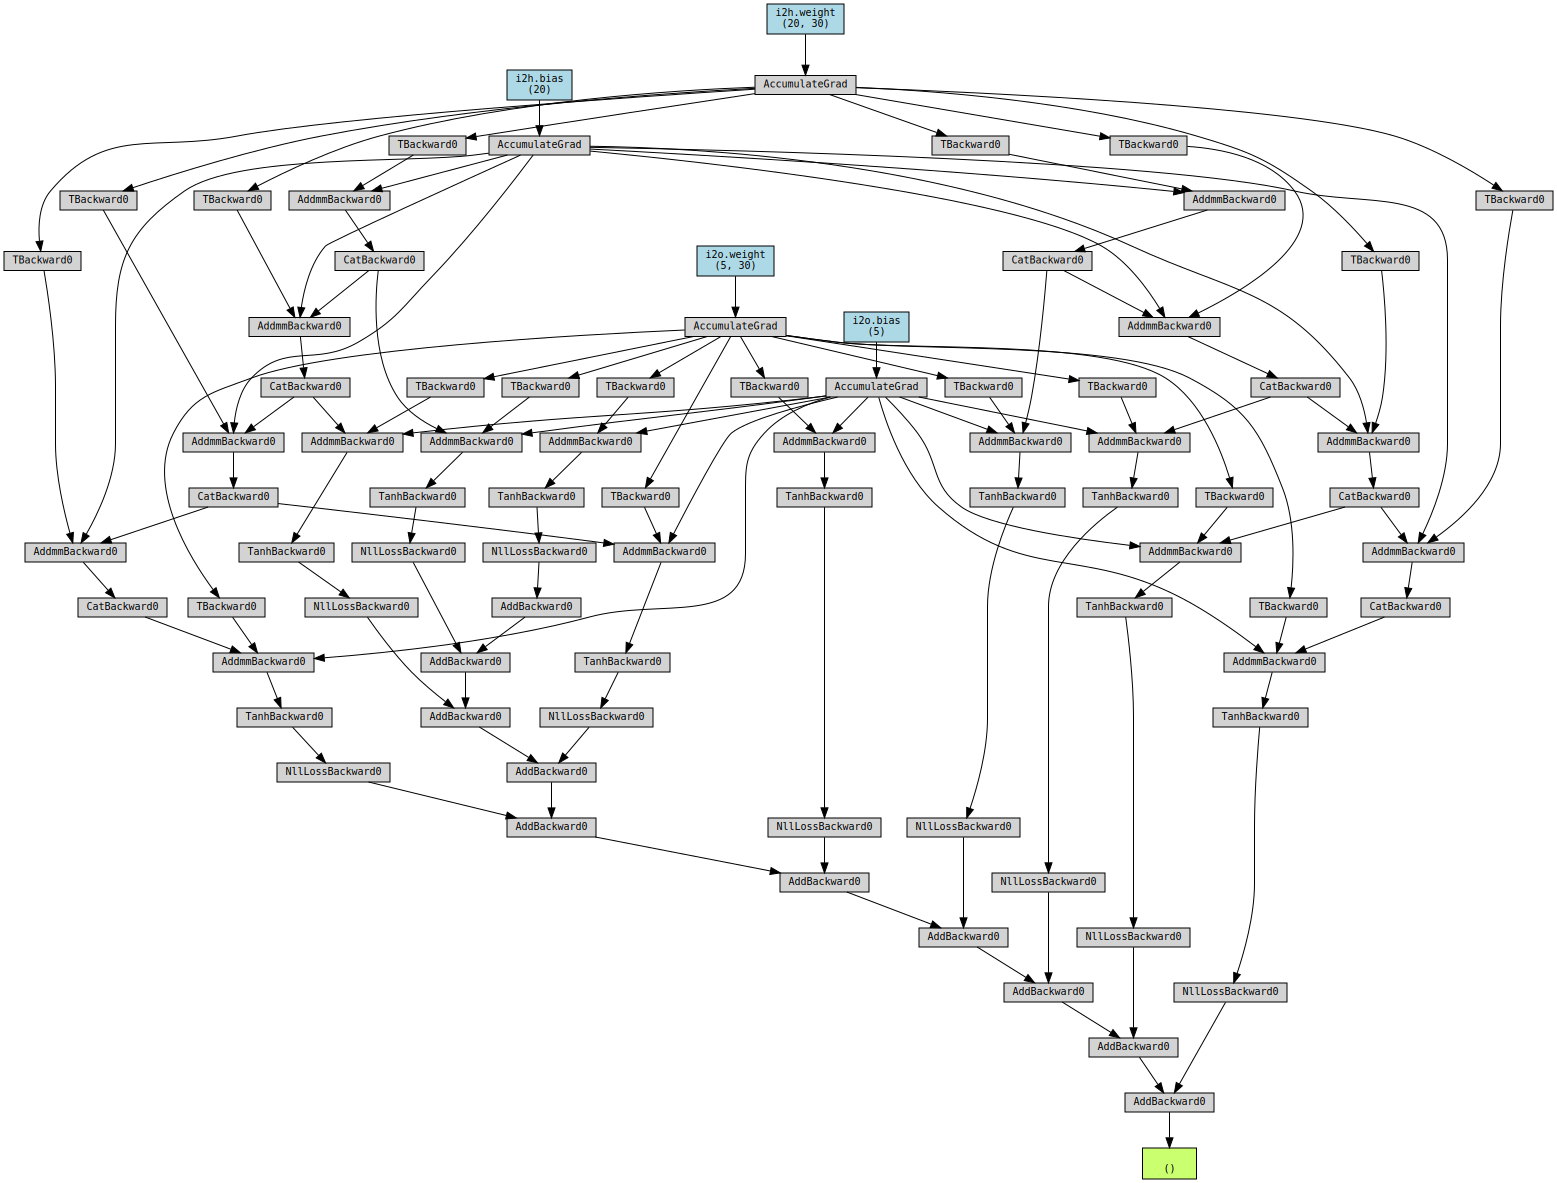

In [19]:
make_dot(RLoss, params=dict(rnn.named_parameters()))